In [2]:
# Run some setup code for this notebook.
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

#内嵌画图
# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (13, 10) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

#实时更新所有修改的模块
# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


In [26]:
import pandas as pd
df = pd.read_csv('./data/mnist.csv') 
data = df.values
X = data[:, 1:]
y = data[:, 0]

print(f"{X.shape = }, {y.shape = }")

X.shape = (407, 784), y.shape = (407,)


In [8]:
class MyPCA:
    def __init__(self, n_components=None):
        self.n_components = n_components #主成分的维度
        self.mean_ = None #均值
        self.components_ = None
        self.explained_variance_ = None #方差
        self.explained_variance_ratio_ = None #方差占比

    def fit_transform(self, X):
        self.mean_ = np.mean(X, axis=0)
        # 中心化
        X_centered = X - self.mean_
        # 计算协方差
        cov_matrix = np.dot(X_centered.T, X_centered) / len(X)
        # 计算特征值和特征向量
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
        # 对特征值按照大小排序
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]
        # 选择n个特征值
        if self.n_components is not None:
            eigenvectors = eigenvectors[:, :self.n_components]
        # 统计
        self.components_ = eigenvectors
        # 映射
        transformed_data = np.real(np.dot(X_centered, eigenvectors))
        # 选定成分的方差
        self.explained_variance_ = np.real(eigenvalues[:self.n_components])
        # 计算方差占比
        total_variance = np.real(np.sum(eigenvalues))
        self.explained_variance_ratio_ = self.explained_variance_ / total_variance
        return transformed_data
    def inverse_transform(self, X_transformed):
        reconstructed_data = np.dot(X_transformed, self.components_.T) + self.mean_
        reconstructed_data = np.real(reconstructed_data)
        return reconstructed_data

my_pca = MyPCA(n_components=2)
result = my_pca.fit_transform(X)
origin = my_pca.inverse_transform(result)
explained_variance = my_pca.explained_variance_
explained_variance_ratio = my_pca.explained_variance_ratio_

print("Transformed Data:")
print(result)
print("Explained Variance:")
print(explained_variance)
print("Explained Variance Ratio:")
print(explained_variance_ratio)
mse = np.mean((X - origin) ** 2)
print("Mean Squared Error:", mse)
frobenius_norm = np.linalg.norm(X - origin, 'fro')
print("Frobenius Norm:", frobenius_norm)


Transformed Data:
[[ -258.70482551   937.24457667]
 [ -358.46549714  -780.80200198]
 [ -866.95798223   359.48580335]
 [ -583.50577081   934.71111001]
 [ -486.30308601   538.97393312]
 [  559.28882959  -273.04922034]
 [ -425.03277569  1186.76461827]
 [ -624.10878409   441.93223518]
 [ -619.18640545   762.35818864]
 [  587.22814733  -538.99925533]
 [ -517.33060503  -474.60041803]
 [ -476.76362294 -1019.49232133]
 [   16.51079029  -514.11872887]
 [   32.67769029 -1106.97127072]
 [  325.78999499  -448.29005334]
 [ -933.51103066   131.71165535]
 [ -767.85986994   103.00843716]
 [  203.02400591  -220.63671232]
 [  467.0656598   -422.60275944]
 [ -551.56235594   132.20251014]
 [ -380.05985798  -316.60115422]
 [   -9.26888792  -366.16990465]
 [   39.28319569   181.82192579]
 [-1090.26787547   582.67755012]
 [ -284.01284267  -757.73423777]
 [ 1044.58238513  -377.08316022]
 [ -765.31534157   393.53306678]
 [ -574.25865078   337.87827351]
 [ -583.06105027  -839.74776285]
 [  838.6566594    186.42

In [47]:
# Assuming X is defined as in your previous code
# X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

# Fit and transform data using scikit-learn's PCA
pca = PCA(2)
newX = pca.fit_transform(X)
print(newX)
print("Explained Variance:")
print(pca.explained_variance_ratio_)
print("Explained Variance Ratio:")
print(pca.explained_variance_)
# Manually compute inverse_transform
invX = np.dot(newX, pca.components_) + pca.mean_
# Calculate reconstruction error
mse = np.mean((X - invX) ** 2)
print("Mean Squared Error (MSE):", mse)
frobenius_norm = np.linalg.norm(X - invX, 'fro')
print("Frobenius Norm:", frobenius_norm)

[[ -258.70313208   937.22488384]
 [ -358.4644072   -780.81291904]
 [ -866.95790673   359.48056463]
 [ -583.50574952   934.71013535]
 [ -486.30433705   538.99011609]
 [  559.28889474  -273.04552217]
 [ -425.03395005  1186.78156582]
 [ -624.10980387   441.94756198]
 [ -619.18526088   762.35101414]
 [  587.22948306  -539.01527508]
 [ -517.32974001  -474.60874517]
 [ -476.76189357 -1019.51072075]
 [   16.51157282  -514.12861911]
 [   32.67949875 -1106.98818446]
 [  325.78802786  -448.27068929]
 [ -933.51110115   131.71332033]
 [ -767.85957158   103.00731987]
 [  203.02308026  -220.62679979]
 [  467.06443989  -422.59079831]
 [ -551.56128294   132.19358781]
 [ -380.06178857  -316.58322943]
 [   -9.26949232  -366.16031418]
 [   39.28265377   181.82781755]
 [-1090.26779631   582.67608089]
 [ -284.01155727  -757.74962652]
 [ 1044.58317769  -377.08962876]
 [ -765.31481642   393.52923785]
 [ -574.26151564   337.90695931]
 [ -583.06076072  -839.74844013]
 [  838.65585292   186.43533431]
 [  288.96

In [5]:
# 实现流形学习算法
X_reduced = None

In [44]:
def mds(distances, n_components):
    # Number of points
    n = len(distances)

    # Centering matrix
    H = np.eye(n) - np.ones((n, n)) / n

    # Double centering
    B = -0.5 * H @ distances**2 @ H

    # Eigen decomposition
    eigenvalues, eigenvectors = np.linalg.eigh(B)

    # Sort eigenvalues and corresponding eigenvectors in decreasing order
    indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[indices]
    eigenvectors = eigenvectors[:, indices]

    # Select top eigenvalues and corresponding eigenvectors
    eigenvalues = eigenvalues[:n_components]
    eigenvectors = eigenvectors[:, :n_components]

    # Compute coordinates in the lower-dimensional space
    X_mds = np.real(np.sqrt(np.diag(eigenvalues)) @ eigenvectors.T)

    return X_mds
# Pairwise distance matrix
distances = np.linalg.norm(X[:, None] - X, axis=-1)

# Classical MDS
X_reduced = mds(distances)


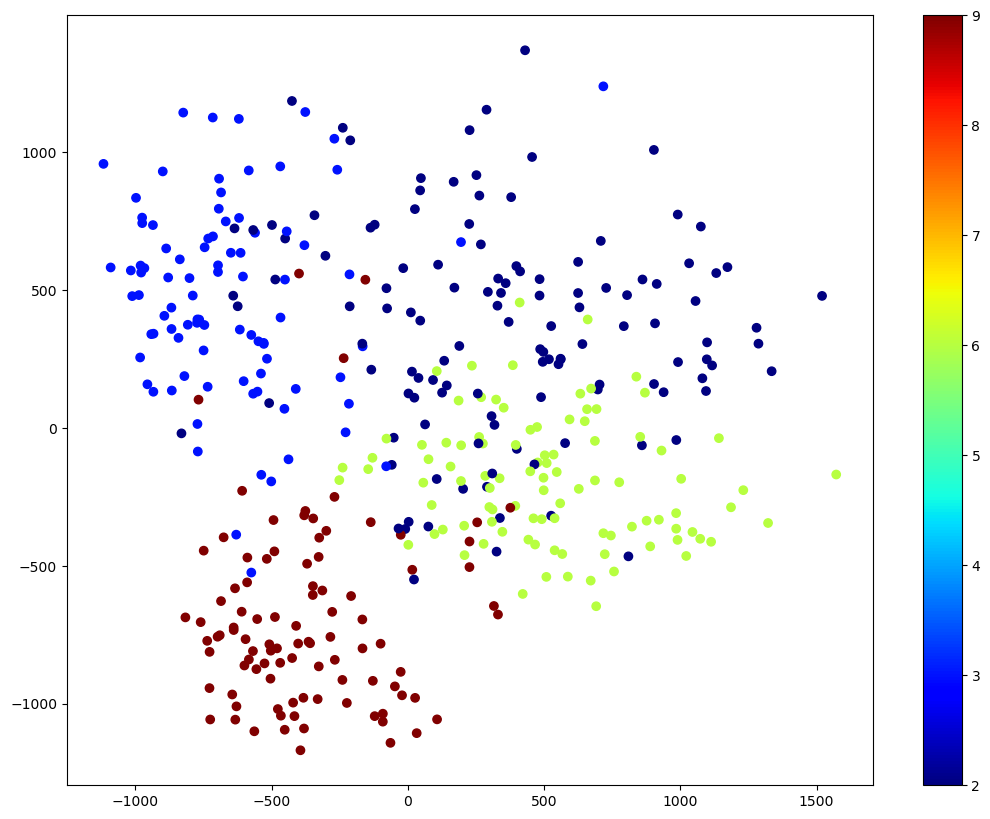

In [46]:
# 可视化降维结果
distances = np.linalg.norm(X[:, None] - X, axis=-1)
X_reduced = classical_mds(distances,2).T
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")
plt.colorbar()
plt.show()

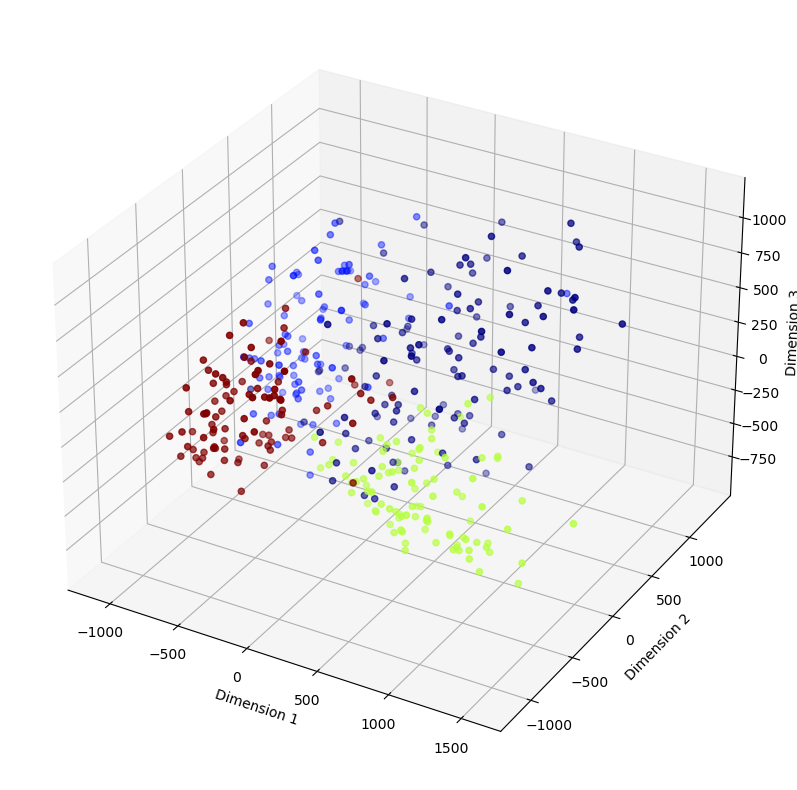

In [48]:
from mpl_toolkits.mplot3d import Axes3D

# Apply classical MDS with 3 components and transpose the result
X_reduced_3D = mds(distances, 3).T

# Visualize the reduced data in a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color-coded labels
ax.scatter(X_reduced_3D[:, 0], X_reduced_3D[:, 1], X_reduced_3D[:, 2], c=y, cmap="jet")

# Set labels for each axis
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')

plt.show()